In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import stats
import pandas as pd 
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [187]:
# Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
N = 100
mu, sigma = 0, 1 # designating mean and standard deviation
x = np.random.normal(mu, sigma, N)
x

array([-0.89455249,  0.6995844 ,  0.40242873, -1.25879956,  0.42202135,
       -0.67127612, -0.3001053 , -0.56679978,  0.17080327,  0.63099943,
        0.11615874,  0.5258509 , -0.57083041,  1.30604285,  1.12916476,
        0.07253913, -0.30377958, -0.52695376, -1.45223111,  1.44138163,
        0.30033801,  1.511776  , -0.05642022,  0.16963408,  0.78840346,
        2.88141946,  0.24812499,  1.01728296,  1.03652259, -1.17808536,
       -1.1256913 , -0.14769313, -0.75549902,  0.9826107 , -0.24173652,
        0.90056263,  2.14060082, -1.28697064, -0.60088837, -0.15809995,
       -1.22827652,  1.57327867, -1.06687365,  0.39439554,  0.39159683,
       -1.11614175, -1.28237084,  0.7082558 ,  1.37588635, -0.72720595,
       -0.34038125,  0.31806055,  1.00034115,  1.96566519,  0.70420328,
        0.21710027,  0.69213998, -0.24194518, -0.68284486,  0.58702474,
       -0.95064929,  0.07189496, -1.34469497, -0.6613743 ,  0.29970657,
       -0.25168798, -0.08470683, -1.07836581, -0.28406591,  0.31

Text(0, 0.5, 'Frequency of x')

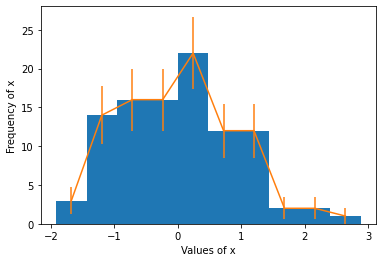

In [188]:
# Fill a histogram in pyplot taking properly care about the aesthetic
import random
#data = [random.randint(1, 100) for _ in range(100)]
data = x #used the data from previous question 
h, e, p = plt.hist(data, bins=10)
plt.errorbar((e[1:]+e[:-1])/2., h, np.sqrt(h)) #setting errorbars according to poisson uncertainty
plt.xlabel("Values of x")
plt.ylabel("Frequency of x")

In [27]:
# For every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. 
#The std default value should be: 1.06∗𝑥.𝑠𝑡𝑑()∗𝑥.𝑠𝑖𝑧𝑒^(−1/5).
#you can use the scipy function stats.norm() for that.
#x = 3
#mu = x
#sigma = 1.06∗x.𝑠𝑡𝑑()∗x.N**(−1/5)
#I don't know how to do this

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

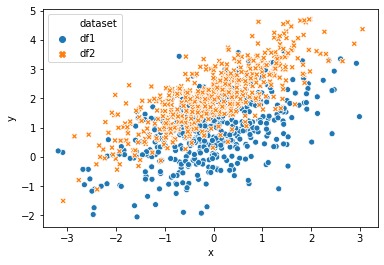

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

#Function
def gauss(mean, cov, n):
    data = np.random.multivariate_normal(mean, cov, n)
    return(data)
    

data1 = gauss([0, 1], [(1, .5), (.5, 1)], 500)
df1 = pd.DataFrame(data1, columns=["x", "y"])
#print(df1)

data2 = gauss([0, 2], [(1, .75), (.75, 1)], 500)
df2 = pd.DataFrame(data2, columns=["x", "y"])
#print(df2)

concatenated = pd.concat([df1.assign(dataset='df1'), df2.assign(dataset='df2')]) #plot together
sns.scatterplot(x='x', y='y', data=concatenated, hue = 'dataset', style='dataset')
plt.show() #Something is still wrong but I can't understand


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [198]:
data = np.load('residuals_261.npy', allow_pickle=True)
#print(data.dtype)   # object
d1 = data.item()
df = pd.DataFrame(d1)
df #Final DataFrame

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [199]:
df.loc[abs(df['residuals']) < 2] #Filtered DataFrame

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [200]:
slope, intercept, r_value, pv, se = stats.linregress(x = df['residuals'], y = df['distances'])
print('slope=',slope, 'intercept=',intercept, 'rvalues=',r_value, 'pv=',pv, 'se=',se) #Values of line regression

slope= 0.07989758117486039 intercept= 9.820720326596168 rvalues= 0.056597511872424046 pv= 2.2958576253921742e-09 se= 0.013360155768341927


LinregressResult(slope=0.07989758117486039, intercept=9.820720326596168, rvalue=0.056597511872424046, pvalue=2.2958576253921742e-09, stderr=0.013360155768341927)

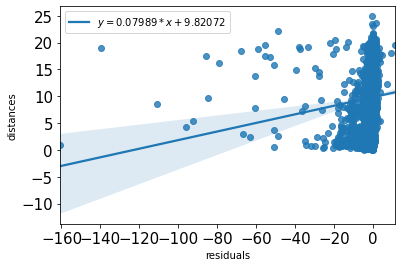

In [201]:
#g = sns.jointplot("residuals", "distances", data=df, kind="reg")
sns.regplot(df['residuals'], df['distances'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)}) #Plot
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)
stats.linregress(x = df['residuals'], y = df['distances'])

[ 1.245  3.735  6.225  8.715 11.205 13.695 16.185 18.675 21.165 23.655] are the centers of the bins
9.779586290539925 is the mean of residuals
5.866775747721357 is the standard deviation of residuals


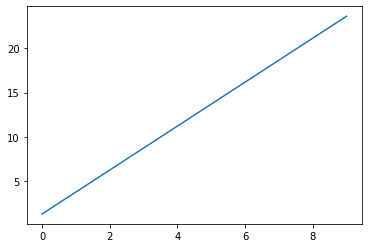

In [202]:
hist, bins = np.histogram(df['distances'])
x = (bins[+1:] + bins[:-1]) / 2
print(x, 'are the centers of the bins')

y = np.average(x, weights=hist)
print(y, 'is the mean of residuals')

var = np.average((x - y)**2, weights=hist)
sd = np.sqrt(var)
print(sd, 'is the standard deviation of residuals')

#mids = 0.5*(bins[:-1] + bins[1:])
#probs = hist / np.sum(hist)
#mean = np.sum(probs * mids)  
#sd = np.sqrt(np.sum(probs * (mids - mean)**2))
plt.plot(x)
             